<a href="https://colab.research.google.com/github/Godswillben/quick_draw_pytorch/blob/master/data/sketch_data_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download datasets for alarm, apple, bus, bread, and car from github
import requests
import zipfile
from pathlib import Path

In [2]:
# download zipfiles to root dir
zip_data_links = ["https://github.com/Godswillben/quick_draw_pytorch/raw/refs/heads/master/data_set/alarm%20clock.ndjson.zip",
                  "https://github.com/Godswillben/quick_draw_pytorch/raw/refs/heads/master/data_set/apple.ndjson.zip",
                  "https://github.com/Godswillben/quick_draw_pytorch/raw/refs/heads/master/data_set/car.ndjson.zip",
                  "https://github.com/Godswillben/quick_draw_pytorch/raw/refs/heads/master/data_set/bus.ndjson.zip"]
zip_dir = [
    "alarm_clock.ndjson.zip",
    "apple.ndjson.zip",
    "car.ndjson.zip",
    "bus.ndjson.zip"
]

for idx, link in enumerate(zip_data_links):
  with open(f"{zip_dir[idx]}", "wb") as f:
    request = requests.get(link)
    print(f"Downloading data: {idx} Data -> {link}")
    f.write(request.content)

In [3]:
# Unzip downloaded dataset
for dir in zip_dir:
  with zipfile.ZipFile(dir, "r") as zip_ref:
    print(f"Unzipping {dir}")
    zip_ref.extractall()

Unzipping alarm_clock.ndjson.zip
Unzipping apple.ndjson.zip
Unzipping car.ndjson.zip
Unzipping bus.ndjson.zip


In [4]:
# install ndjson to work with ndjson files. pandas would come in handy also.
!pip install -q ndjson

In [5]:
# get open alarm data
import ndjson

def open_ndjson(file_path:str):
  with open(file_path) as f:
    data = ndjson.load(f)
    data = data[:10000]
  return data

alarm_data = open_ndjson("alarm clock.ndjson")
apple_data = open_ndjson("apple.ndjson")
bus_data = open_ndjson("bus.ndjson")
car_data = open_ndjson("car.ndjson")

In [6]:
len(alarm_data), len(apple_data), len(bus_data), len(car_data)

(10000, 10000, 10000, 10000)

In [7]:
train_test_split = (.7 * len(alarm_data))
train_test_split

7000.0

In [8]:
alarm_data[0]

{'word': 'alarm clock',
 'countrycode': 'US',
 'timestamp': '2017-03-21 13:02:16.24617 UTC',
 'recognized': True,
 'key_id': '5159910851477504',
 'drawing': [[[111,
    148,
    161,
    175,
    199,
    218,
    231,
    236,
    234,
    227,
    210,
    172,
    140,
    118,
    104,
    59,
    45,
    38,
    33,
    34,
    50,
    73,
    99,
    115],
   [35,
    31,
    36,
    45,
    72,
    105,
    141,
    179,
    214,
    226,
    240,
    252,
    255,
    254,
    251,
    217,
    192,
    170,
    117,
    97,
    71,
    48,
    39,
    38]],
  [[137, 141, 145, 134, 131, 139], [150, 153, 162, 162, 156, 152]],
  [[135, 116, 82], [153, 120, 79]],
  [[103, 91, 75, 72], [71, 74, 68, 103]],
  [[149, 207], [161, 165]],
  [[188, 223, 194], [136, 166, 178]],
  [[73, 65, 48, 35, 23, 0, 8, 20], [40, 23, 5, 4, 7, 31, 62, 81]],
  [[69, 65, 21], [34, 42, 85]],
  [[218, 198, 180], [70, 39, 24]],
  [[228, 231, 235, 227, 218, 181, 160], [71, 68, 29, 6, 1, 0, 13]]]}

In [9]:
# function to pad data
def pad_draw_data(data, pad_value=0):
  """
  Takes a list of draw strokes: int

  find the sublist in data with the max lenth.
  fills other sublist less that max length with pad_values to match sublist with highest value

  Returns:
    List of List[int]
  """
  # find sublist with max length
  max_length = max(len(sublist) for row in data for sublist in row)
  padded_data = [
      [sublist + [sublist[len(sublist)-1]] * (max_length - len(sublist)) for sublist in row] # 0 * [0] = []; 1 *[0]=[0]; n * [0]=[0,...n] # pad  with last drawing point num
      for row in data
  ]

  return padded_data

a_data1=(pad_draw_data(alarm_data[0]["drawing"]))

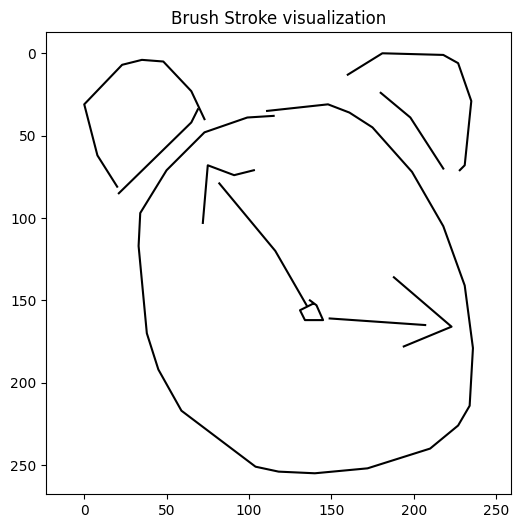

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for stroke in a_data1:
  x_coords, y_coords = stroke
  plt.plot(x_coords, y_coords, c="black")

plt.gca().invert_yaxis()
plt.axis("equal")
plt.title("Brush Stroke visualization")
plt.show()

In [11]:
# padd all drawing strokes in data
def pad_all_drawings(data):
  length_of_data = len(data)-1
  new_data = []
  for drawing in data:
    paded=pad_draw_data(drawing["drawing"])
    new_data.append(paded)
  return new_data

alarm_data= pad_all_drawings(alarm_data)
apple_data=pad_all_drawings(apple_data)
bus_data = pad_all_drawings(bus_data)
car_data = pad_all_drawings(car_data)
# len(alarm_data), alarm_data[23]

In [15]:
train_test_split = int(train_test_split)

In [14]:
alarm_train, alarm_test = alarm_data[:int(train_test_split)], alarm_data[int(train_test_split):]

len(alarm_train), len(alarm_test)

(7000, 3000)

In [16]:
train_split = train_test_split

In [17]:
apple_train, apple_test = apple_data[:train_split], apple_data[train_split:]
bus_train, bus_test = bus_data[:train_split], bus_data[train_split:]
car_train, car_test = car_data[:train_split], car_data[train_split:]

len(apple_train), len(apple_test), len(bus_train), len(bus_test), len(car_train), len(car_test)

(7000, 3000, 7000, 3000, 7000, 3000)

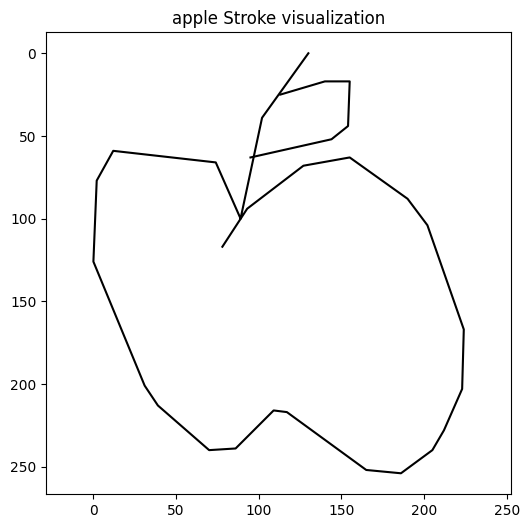

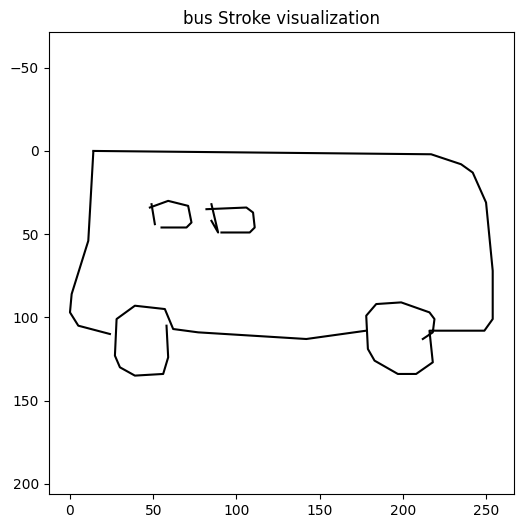

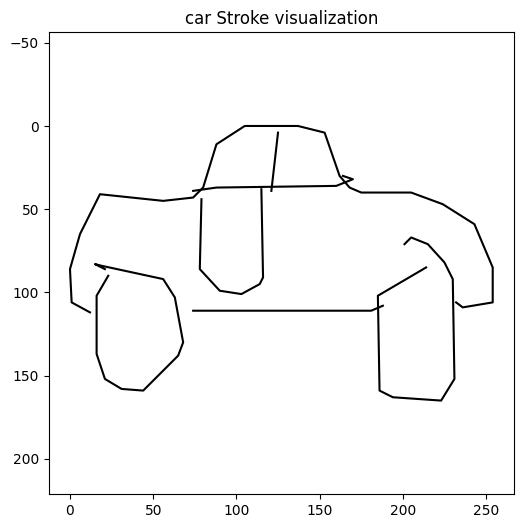

(None, None, None)

In [25]:
# Function to plot drawings
import matplotlib.pyplot as plt
import random

def plot_drawing(data, name="draw"):
  plt.figure(figsize=(6,6))
  for stroke in data:
    x_coords, y_coords = stroke
    plt.plot(x_coords, y_coords, c="black")

  plt.gca().invert_yaxis()
  plt.axis("equal")
  plt.title(f"{name} Stroke visualization")
  plt.show()

rand_rang = random.randint(0, 7000-1)
plot_drawing(apple_train[rand_rang], "apple"), plot_drawing(bus_train[rand_rang], "bus"), plot_drawing(car_train[rand_rang], "car")

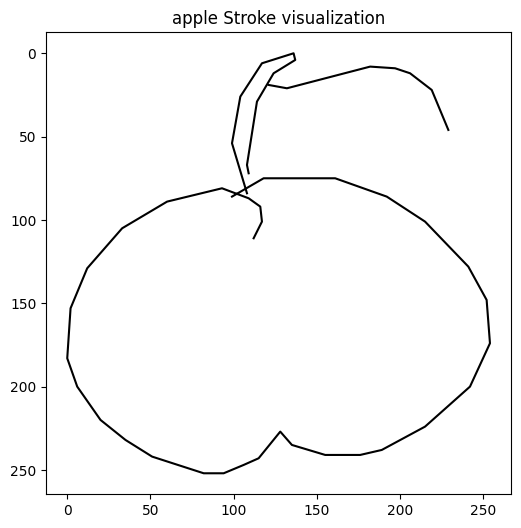

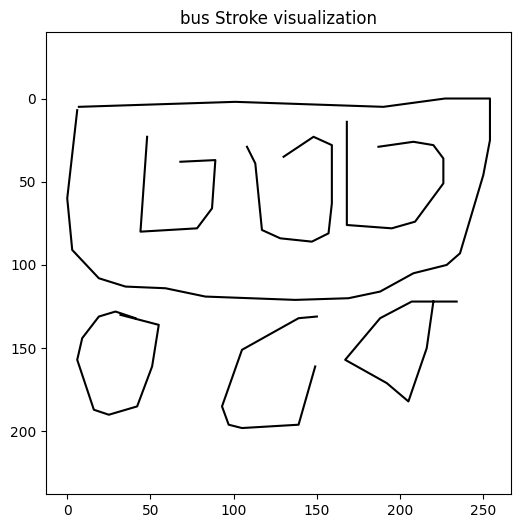

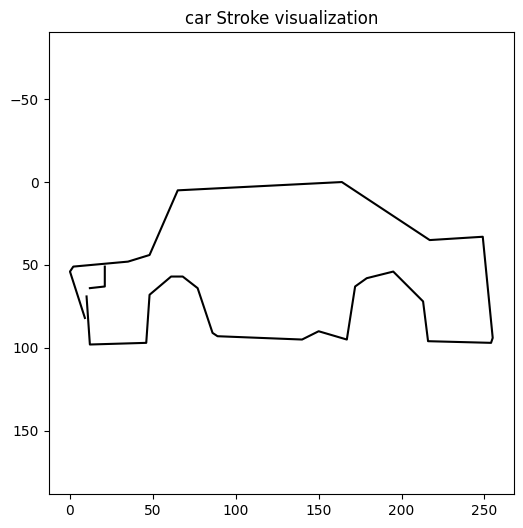

(None, None, None)

In [27]:
rand_rang = random.randint(0, 3000-1)
plot_drawing(apple_test[rand_rang], "apple"), plot_drawing(bus_test[rand_rang], "bus"), plot_drawing(car_test[rand_rang], "car")

In [32]:
def strokes_to_img(strokes, output_path, image_size=(256, 256)):
  """
  """
  fig, ax = plt.subplots(figsize=(image_size[0]/100, image_size[1]/100), dpi=100)
  ax.set_xlim(0, 255)
  ax.set_xlim(0, 255)
  ax.axis("off")

  # plot each stroke
  for stroke in strokes:
    x, y = stroke
    ax.plot(x, y, color="black", linewidth=2)

  plt.gca().invert_yaxis()
  plt.axis("equal")
  plt.savefig(output_path, bbox_inches="tight", pad_inches=0)
  plt.close(fig)

In [37]:
# Create draw data_v1 directory.
from pathlib import Path

data_dir = Path("draw_img_v1")
train_dir = data_dir / "train"
test_dir = data_dir / "test"

def drawings_to_image(filepath, filename, data):
  """
    Loops through data:[List with sublist of int representing brush strokes].
    Writes image files of all drawing in data
  """
  directory = filepath
  directory.mkdir(parents=True, exist_ok=True)

  for idx, drawing in enumerate(data):
    strokes_to_img(drawing, filepath/f"{filename}{idx}.png", image_size=(64, 64))

In [33]:
# create alarm train images in folder
drawings_to_image(train_dir/"alarm")